
# P2I7: Mini Projet 1 - Gaz Parfaits - Code A - Ressort


## Prénom Nom - Groupe - Date :

16/03/2023 SAMAIN Luc G93 G274


## Introduction

Le but de ce mini-projet est de réaliser un simulateur capable de prendre en compte un gaz de particules dans une enceinte. Pour faire de la physique, vous verrez qu'une seule particule suffit. Il va suivre la progression suivante :

* Modélisation d'un ressort
* Modélisation du rebond d'une particule sur une paroi
* Modélisation d'une particule dans une boîte rectangulaire
* Compression de ce "gaz" par un piston

Un notebook sera rendu pour chaque cas. Pour vous évaluer, les professeurs essaieront d'exécuter vos notebooks et d'observer ce qu'ils produisent. Soyez donc attentifs à :

* Rendre des notebooks qui s'exécutent
* Commenter votre code, notamment si des actions du lecteur sont nécessaires
* Soigner le rendu visuel de vos graphiques
* Etre pertinent(e) et complèt(e) dans vos réponses aux questions, dans les différents espaces prévus à cet effet.


## Pour commencer… un peu de math ou Euler versus Verlet

Pour intégrer la deuxième loi de Newton, on peut utiliser des techniques mathématiques de résolution d’équations différentielles, mais celles ci ne restent possibles quand dans des cas très particuliers (oscillateur harmonique, particule soumise à une force constante, etc). Pour disposer d’un cadre plus général, un schéma d’intégration numérique va être utilisé : nous allons calculer les vitesse $v ⃗(t+Δt)$ et positions $x ⃗(t+Δt)$ à partir des vitesse $v ⃗(t)$, position $x ⃗(t)$ et accélération $a ⃗(t)$.

1ère méthode (**Euler explicite**), en utilisant le schéma d’intégration suivant :

$v ⃗(t+Δt)=v ⃗(t)+a ⃗(t)∙Δt$

$x ⃗(t+Δt)=x ⃗(t)+v ⃗(t)∙Δt$

2ème  méthode (**Verlet modifié**), en utilisant le schéma d’intégration suivant :

$v ⃗(t+Δt)=v ⃗(t)+a ⃗(t)∙Δt$

$x ⃗(t+Δt)=x ⃗(t)+v ⃗(t+Δt)∙Δt$


## Elaboration d’un simulateur dynamique

On va maintenant appliquer les schémas de résolution d'Euler et de Verlet afin de construire un simulateur dynamique. Dans un premier temps, celui-ci sera appliqué à un système simple (masse-ressort), puis il sera progressivement complexifié dans les notebooks suivants afin d'aboutir à la modélisation d'un gaz parfait.

Le système à modéliser est le suivant :

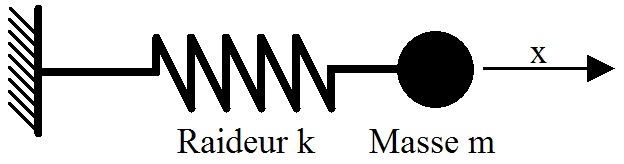

Une masse ponctuelle m est située au bout d'un ressort de raideur k, qui lui applique une force :

$f ⃗_x=-k∙x ⃗$

La variable X représente la position de la masse sur l'axe horizontal, et on note que la position X0=0 correspond à la position d'équilibre du ressort (i.e. celle pour laquelle il ne développe pas d'effort). La masse est uniquement libre de se déplacer sur l'axe horizontal, et sa vitesse instantanée est notée Vx. A partir de conditions initiales quelconques X0 et Vx0, on souhaite mettre en place une simulation permettant de prévoir la trajectoire de la masse au cours du temps. Le premier bloc de code charge les bibliothèques nécessaires :

In [1]:
#libraries à importer
%matplotlib inline 
%matplotlib inline
%matplotlib notebook
%matplotlib notebook
from matplotlib import pyplot as plt        #librairie d'affichage
import numpy as np
from matplotlib import animation

## Etape 1

Créer et renseigner les variables suivantes : T0 et Tf (instants initial et final de la simulation), dT (pas de temps de la résolution), X0 et Vx0 (conditions initiales), M et K. VOus pouvez aussi créer une chaîne de caractère nommée "Solver", de façon à pouvoir basculer facilement d'un schéma à l'autre (Voir Etape 8).

In [2]:
t0 = 0 # (s)
tf = 3 # (s)
dt = 1e-4 # pas de temps

l0 = 0.05 #longueur ressort au repos en m soit 10cm # repère fixe au carter gauche
X0 = l0
Vx0 = 0.1 #m.s-1 

m = 0.01 #masse en kg de 10g 
k = 0.1 #raideur en N.m-1

Solver = input("Entrer 'euler explicite' ou 'verlet modifié'")

Entrer 'euler explicite' ou 'verlet modifié'verlet modifié


## Etape 2

Calculer le nombre de pas total de la simulation, et initialiser les vecteurs T, X, et Vx qui serviront à recueillir l'évolution au cours de la simulation des variables temps, position, et vitesse. Renseigner T0, X0 et Vx0 aux positions initiales de ces vecteurs.

In [3]:
#on a dt=(tf - t0)/N ==> N = (tf - t0)/dt
N = int((tf - t0)/dt)
T =  np.zeros(N+1)

#matrice position, vitesse
X = np.zeros(N+1) + X0 #tout à X0 le reste sera remplacer au fur et à mesure de la simulation
Vx = np.zeros(N+1) + Vx0 #voir ligne au dessus

## Etape 3

Ouvrir la boucle principale. A chaque pas de temps, compléter le vecteur T et calculer la valeur de la force Fx. Appliquer ensuite le schéma d'Euler pour calculer les nouvelles valeurs de X et Vx. Fermer ensuite la boucle

In [4]:
if Solver == "euler explicite":
    for i in range(1, N+1):
        #Mise à jour du temps:
        T[i] = i * dt #temps 0 = 0, temps 1 = dt, temps 2 = 2dt
        
        #Mise à jour de la position:
        X[i] = X[i-1] + Vx[i-1]*dt
        
        #Mise à jour Vitesse:
        
        #Force élastique car on néglige le poids:
        Fx = -k*(X[i-1] - l0)
        
        #Accélération:
        #On a, ΣF = m *dv/dt ==> dv/dt = ΣF / m
        a = Fx/m
        
        Vx[i] = Vx[i-1] + a*dt 
        
elif Solver == "verlet modifié":
    for i in range(1, N+1):
        #Mise à jour du temps:
        T[i] = i * dt #temps 0 = 0, temps 1 = dt, temps 2 = 2dt
        
        #On ne peut pas mettre à jour directement la position avec ce schéma
        #On met à jour avant la vitesse:
        
        #Force élastique car on néglige le poids:
        Fx = -k*(X[i-1] - l0)
        
        #Accélération:
        #On a, ΣF = m *dv/dt ==> dv/dt = ΣF / m
        a = Fx/m
        
        Vx[i] = Vx[i-1] + (Fx/m)*dt # ΣF = m *dv/dt ==> dv/dt = ΣF / m #on néglige le poids...
        
        #Mise à jour de la position:
        X[i] = X[i-1] + Vx[i]*dt

## Etape 4

A la suite de la boucle, à partir des vecteurs donnant l'évolution temporelle de X et Vx, calculer l'évolution temporelle de l'énergie cinétique $0.5*M*Vx^2$ et potentielle $0.5*K*X^2$, puis l'énergie totale du système.

In [5]:
Ec = 0.5 * m * Vx**2 #Energie cinétique
Ep = 0.5 * k * (X-l0)**2 #Energie potentielle
Et = Ec + Ep

## Etape 5

Sorties graphiques : Tracer les variables X et Vx en fonction du temps.

<IPython.core.display.Javascript object>


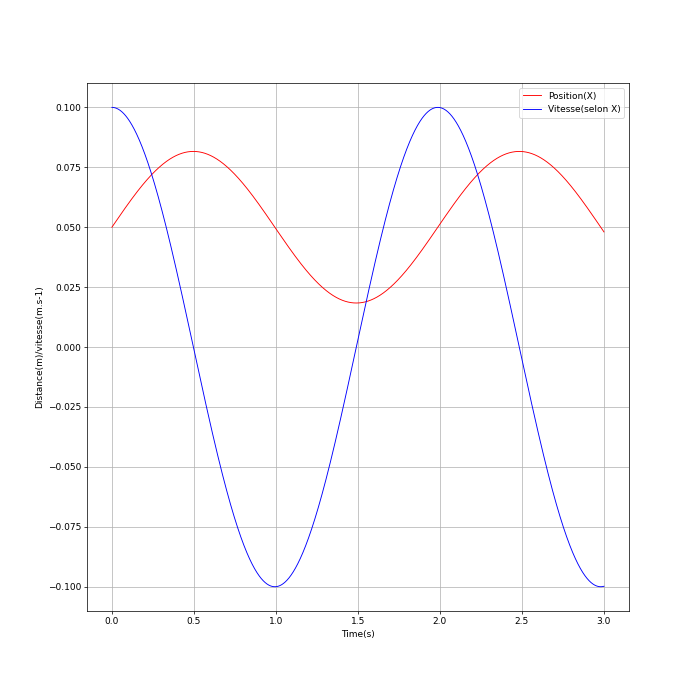

In [6]:
fig, ax1 = plt.subplots(figsize=(12, 12))
ax1.set_xlabel('Time(s)')
ax1.set_ylabel('Distance(m)/vitesse(m.s-1)')
ax1.plot(T, X, color='red', lw=1, label='Position(X)')
ax1.plot(T, Vx, color='blue', lw=1, label='Vitesse(selon X)')
plt.legend()
plt.grid()

## Etape 6

Sorties graphiques : Tracer les énergies cinétique, potentielle et totale en fonction du temps. 

<IPython.core.display.Javascript object>


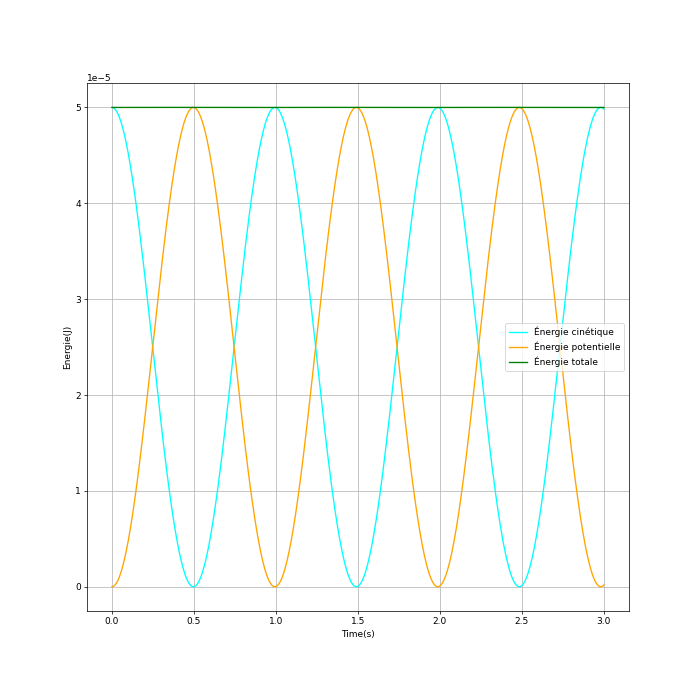

In [7]:
fig, ax2 = plt.subplots(figsize=(12,12))
ax2.set_xlabel('Time(s)')
ax2.set_ylabel('Energie(J)')
ax2.plot(T, Ec, color='cyan', lw=1.5, label='Énergie cinétique')
ax2.plot(T, Ep, color='orange', lw=1.5, label='Énergie potentielle')
ax2.plot(T, Et, color='green', lw=1.5, label='Énergie totale')
plt.legend()
plt.grid()

## Etape 7

Commentez dans la cellule suivante les résultats de votre simulation. Que pouvez-vous dire du schéma d'Euler explicite dans ce contexte ? Comment évolue l'énergie totale du système ? Que se passe-t-il si on modifie le pas de temps  de simulation ?

## Réponse :

  ##### Les résultats de simulations sont abérrants. En effet, simplement à la vu du tracé sur les énergies, il est impossibles d'accrôitre sens apport énergétique extérieur l'énergie d'un systeme. Cette notion se remarque aussi sur la vitesse du ressort qui tend à l'infini. Ainsi on peut aisément conclure que le schéma d'Euler explicite est instable. En modifiant le pas de temps(en l'augmentant) on voit la dégradation très rapide du schéma d'Euler explicite.

## Etape 8

Utilisez la chaîne de caractère "Solver" que vous avez défini dans l'étape 1,  afin que l'utilisateur du notebook puiss choisir son schéma : Dans la boucle principale (Etape 3), insérez un test sur cette chaîne de caractère, permettant l'utilisation d'un schéma ou d'un autre. Codez le schéma de Verlet, et relancez votre kernel du début. Commentez dans la cellule suivante les résultats de votre simulation. Comparez les deux schémas.

## Réponse :

##### Par rapport à Euler explicite, le schéma modifié de Verlet  semble ne pas se dégrader. L'énergie du système est conservé et la vitesse n'explose pas au cours du temps(elle reste constante car pas de frottement). Attention cependant, lorsqu'on augmente le pas de temps, la modification du schéma de Verlet s'amplifie et l'énergie totale varie au cours du temps(probleme temporel i-1 et i, les calcluls ne sont pas synchronisés). 